# DIOPORCO

Ovvero, where we try to design a fucking hypersonic waverider, and plot it too

In [1]:
import numpy as np
from math import *

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import gridspec

from supersonic_shock_solver import *

def todeg(alpha):
    return 180.0*alpha/np.pi
def torad(alpha):
    return alpha * np.pi / 180.0
    

res = oblique_shock(torad(8), 2.9, 280, 10000, 0.1)
print(res)
print(todeg(res[0]),todeg(res[1]))

Wedge, shock angle in degrees 37.440000000000005
Wedge, downstream Mach number 1.731881534166443
Cone, shock angle in degrees 31.679999999999996
Cone, downstream Mach number 1.9545019111206405
(0.4618141200776996, 0.141842854479701, 2.4948231952811746, 332.0581089945261, 17812.948233972595, 0.15020339423767984, 902.3553450742417, 128.8580009357316)
26.460000000000004 8.12699691577517


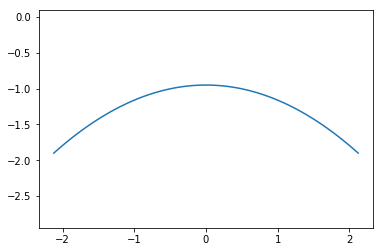

In [134]:
omega = 8 # degrees
Minf = 5.5
T = 280
Pr = 10000
rho = 0.1

res = oblique_shock(torad(omega), Minf,T,Pr,rho)
betaR = res[0]
betaD = todeg(res[0])
omK = res[1]

L = 10 # length = 10 meters
R = L * sin(betaR)
Rc = L * sin(torad(omega))
baseline = lambda y: -3.0/(5*R)*y*y - (1.0/3)*R
def new_baseline(y):
    res = baseline(y)
    for i in range(len(res)):
        if res[i]>= -1 and res[i]<=1:
            res[i] -= (1- np.abs(res[i])**2 )
            
    return res

y = np.linspace( -sqrt(5.0/9)*R , sqrt(5.0/9)*R , 100 )
z = np.array(baseline(y))

plt.axis('equal')
plt.plot(y,z)


In [135]:
# BASELINE
P1 = [ (L, e[0], e[1] ) for e in zip(y,z) ]

#LEADING EDGE
P2 = [ ( sqrt(e[1]**2 + e[2]**2 )/tan(betaR) , e[1] , e[2] ) for e in P1 ]

#TRAILING EDGE
# P3 = [ ( one[0] , one[1] + two[1] * (one[0] - two[0]) * tan(torad(omega))/sqrt(two[1]**2 + two[2]**2) , \
#         one[2] + two[2] * (one[0] - two[0])*tan(torad(omega)) /sqrt(two[1]**2 + two[2]**2)  ) for one in P1 for two in P2 ]
P3 = []

for i in range(len(P1)):
    P3.append(( P1[i][0] , P1[i][1] + P2[i][1] * (P1[i][0] - P2[i][0]) * tan(torad(omega))/sqrt(P2[i][1]**2 + P2[i][2]**2) , \
            P1[i][2] + P2[i][2] * (P1[i][0] - P2[i][0])*tan(torad(omega)) /sqrt(P2[i][1]**2 + P2[i][2]**2) ) )


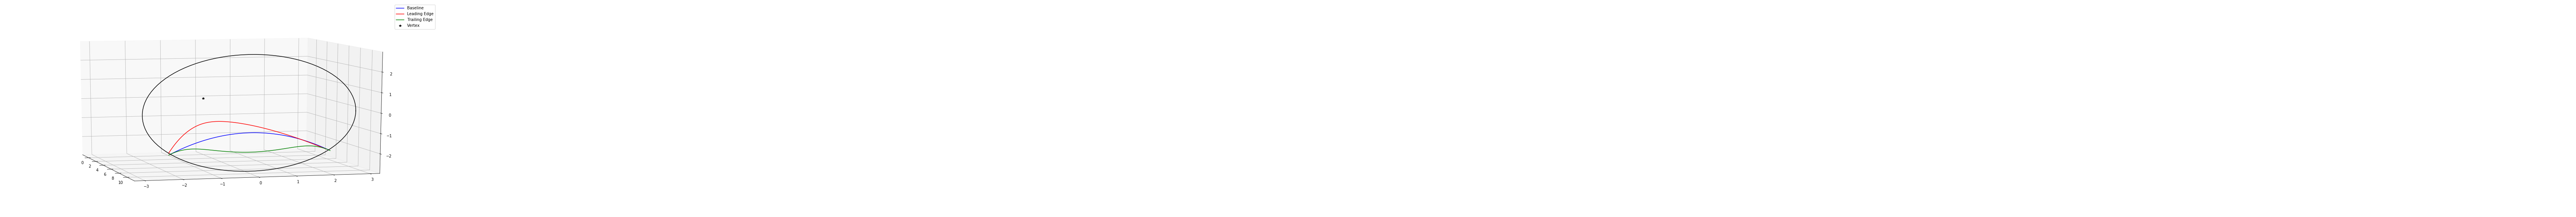

In [142]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(10, -15)
ax.axis('equal') # scaling
# ax.set_xlim3d(-0.5, L+1)
# ax.set_ylim3d(-R+1,R+1)
# ax.set_zlim3d(-R+1,R+1)


# BASELINE
x = [e[0] for e in P1]
y = [e[1] for e in P1]
z = [e[2] for e in P1]
plt.plot( x,y,z,'b', label='Baseline')

# LEADING EDGE
x = [e[0] for e in P2]
y = [e[1] for e in P2]
z = [e[2] for e in P2]
plt.plot( x,y,z,'r',label='Leading Edge')

# TRAILING EDGE
x = [e[0] for e in P3]
y = [e[1] for e in P3]
z = [e[2] for e in P3]
plt.plot( x,y,z,'g', label='Trailing Edge')

# VERTEX OF SHOCK CONE
plt.plot( [0],[0],[0],'*k', label='Vertex' )

# AXIS OF SHOCK CONE
#plt.plot( [0,L],[0,0],[0,0],'k' )

# BASE OF SHOCK WAVE
t = np.linspace(0,2*np.pi,100)
y = R * np.cos(t)
z = R * np.sin(t)
x = np.array( [L for i in y] )
plt.plot(x,y,z,'k')

# BASE OF FAKE CONE
t = np.linspace(0,2*np.pi,100)
y = Rc * np.cos(t)
z = Rc * np.sin(t)
x = np.array( [L for i in y] )
#plt.plot(x,y,z,'k')

plt.legend()

In [110]:
X,Y = np.meshgrid(t,t)
Z = np.sin(X+Y)
type(Z)

numpy.ndarray